# **Рубежный контроль №1** 
# **Тема: Методы обработки данных.**

**Задача (Задание 1)**



> Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных с использованием библиотек Matplotlib и Seaborn. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков? Проведите корреляционный анализ. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

**Вариант 6**


**Выполнение работы**



1.   **Подготовка данных**






In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [46]:
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ММО/РК1/Admission_Predict.csv', sep=',')
print('rows: ',data1.shape[0])
print('columns: ',data1.shape[1])

rows:  400
columns:  9


В выбранном датасете содержится ровно 400 строк и 9 колонок. Далее необхдимо изучить типы данных для каждой из колонок.

In [48]:
def getColumns(dataName, data):
  print(dataName)
  df = pd.DataFrame(data = np.c_[data.columns, data1.dtypes.values], columns= ['columnName', 'columnType'])
  print(df, '\n')

getColumns(dataName= 'Graduate Admission 2', data= data1)

Graduate Admission 2
          columnName columnType
0         Serial No.      int64
1          GRE Score      int64
2        TOEFL Score      int64
3  University Rating      int64
4                SOP    float64
5               LOR     float64
6               CGPA    float64
7           Research      int64
8   Chance of Admit     float64 



Все девять переменных являются числовыми параметрами (типы данных int64 и float64), поэтому нет необходимости в поиске алгоритма перевода категориальных параметров в числовые.

> Описание переменных

* GRE Scores        -         Результаты GRE
* TOEFL Scores      - Результаты TOEFL
* University Rating   - Университетский рейтинг
* Statement of Purpose and Letter of Recommendation Strength - Заявление о цели и рекомендательное письмо
* Undergraduate GPA  - Бакалавриат GPA
* Research Experience  - Исследовательский опыт 
* Chance of Admit  - Возможен допуск

Далее рассмотрим пропуски в датасете.

In [10]:
# функция просмотра переменных с процентным соотношением пустых наблюдений в ней
def getColumnsWithEmptyCells(dataToPrepare, printFlag=True ): 
  percentOfMissingValues = round(dataToPrepare.isnull().sum() / len(dataToPrepare) * 100 , 2)
  percentOfMissingValues = percentOfMissingValues[percentOfMissingValues > 0]
  columnTypes = pd.Series(dataToPrepare[percentOfMissingValues.index.values].dtypes)
  if(printFlag):
    print(pd.DataFrame(data= np.c_[percentOfMissingValues, columnTypes], columns=['Missing %', 'Type'], index= [percentOfMissingValues.index.values]))
  return percentOfMissingValues.index.values

getColumnsWithEmptyCells(data1)

Empty DataFrame
Columns: [Missing %, Type]
Index: []


array([], dtype=object)

В данном датасете не содержится пропусков, поэтому нет необходимости в поиске алгоритма замены пропусков. Рассмотрим названия колонок.

In [40]:
# Подсчет пробелов в названиях колонок и подготовка массива для их корректировки
def correctColumns(colArray: np.array):
  res = dict()
  correctedCols = dict()
  for name in colArray:
    spaces = 0
    for char in name:
      if char ==' ':
        spaces +=1
    words_count = len(name.split())
    mustBe = words_count - 1
    if mustBe != spaces:
      print(name, {'spaces': spaces, 'must_be': mustBe})
    correctedCols[name] = name.strip()
  return correctedCols

newCols = correctColumns(data1.columns)
data2 = data1.rename(newCols, axis='columns', errors='raise')

LOR  {'spaces': 1, 'must_be': 0}
Chance of Admit  {'spaces': 3, 'must_be': 2}


Таким образом, не во всех названиях колонок находится коррекктное число пробелов (а именно `LOR` и `Chance of Admit`), поэтому необходимо их скорректировать, так как это будет препятствовать дальнейшему анализу.

**Результат:** Была проведена подготовка датасета к дальнейшему разведочному анализу, были изучены описания колонок.

2. **Разведочный анализ**



In [54]:
for col in data2.columns:
  print (col, 'count of unique:', len(data2[col].unique()))


Serial No. count of unique: 400
GRE Score count of unique: 49
TOEFL Score count of unique: 29
University Rating count of unique: 5
SOP count of unique: 9
LOR count of unique: 9
CGPA count of unique: 168
Research count of unique: 2
Chance of Admit count of unique: 60



Исходя из описания датасета и проведенного анализа уникальных значений, можно выяснить следующее: в нем содержатся данные кандидатов к зачислению. Большая часть переменных (`GRE`, `Score TOEFL`, `Score University`, `Rating SOP`, `LOR`, `CGPA`, `Research`) отвечает за личные достижения кандидатов, тогда как колонка `Chance of Admit` содержит значение вероятности к зачислению, она и будет представлять наибольший интерес и в дальнейшем будем ее считать целевым параметром.


**Корреляционный анализ**


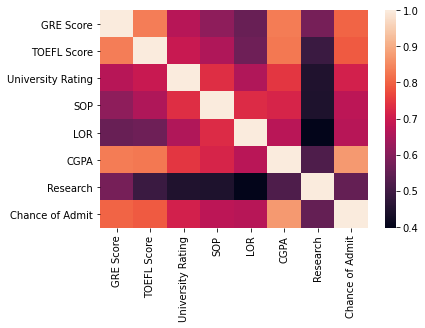

In [45]:
import seaborn as sbrn
sbrn.heatmap(data2[data2.columns[1:]].corr())

Исходя из корреляционного анализа, можно сделать вывод: в наибольшей линейной зависимости от `Chance of Admit` находится `CGPA`, тогда как `GRE Score` и  `TOEFL Score` находятся в чуть меньшей. Дальнейший анализ будем проводить, опираясь на эти переменные.

**Распределения CGPA, GRE Score, TOEFL Score**

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as pltl

In [87]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Scatter(x=data2['Chance of Admit'], y=data2['CGPA'],  mode='markers'), 
                row=1, 
                col=1)

fig.add_trace(go.Scatter(x= data2['Chance of Admit'], y=  data2['GRE Score'],  mode='markers'), 
                row=1, 
                col=2)

fig.add_trace(go.Scatter(x=data2['Chance of Admit'], y=  data2['TOEFL Score'],  mode='markers'), 
                row=1, 
                col=3)

fig.update_xaxes(title_text="Chance of Admit", row=1, col=1)
fig.update_yaxes(title_text="CGPA", row=1, col=1)

fig.update_xaxes(title_text="Chance of Admit", row=1, col=2)
fig.update_yaxes(title_text="GRE Score", row=1, col=2)

fig.update_xaxes(title_text="Chance of Admit", row=1, col=3)
fig.update_yaxes(title_text="TOEFL Score", row=1, col=3)

# fig.update_layout(
#     autosize=True,
#     height=600
# )
fig.show()

Графики распределения показали, следующее:
*  Чем выше значение CGPA у кандидата, тем больший шанс он имеет на зачисление. Имеются выбросы: некоторые кандидаты с высоким значением CGPA имеют те же шансы на поступление, что и у кандидатов с более низким значением. Однако у кандидатов с шансами на поступление >0.8, подобных выбросов не наблюдается. На графике отчетливо видна высокая кучность распределения.
*  Высокое значение GRE Score, увеличивает шансы кандидата на зачисление, однако есть кандидаты, имеющие один и тот же балл GRE Score, но имеют разные шансы на поступление. Например, отчетливо наблюдается разброс в пределах 320 -330 GRE Score. Кандидаты в этом диапазоне имеют шансы на поступление как <0.6 так и >0.8. Несмотря на это, все равно наблюдается линейная зависимость.
* Исходя из построенных графиков распределения, можно сказать, что шансы на поступление слабее зависят от переменной TOFL_Score, чем от других. Немногие кандидаты, которые имеют значения в переменной TOFL_Score >115, имеют одинаково высокий шанс на поступление. Зачастую, кандидаты набирают одинаковое количество баллов TOFL_Score, но при этом имеют разные шансы на поступление. Это являение выражается множеством горизонтальных групп на графике распределения.

*Таким образом*, для построения моделей машинного обучения, следует обратить внимание на переменные `CGPA` `GRE_Score`


**Анализ кандидатов с наибольшим шансом на зачисление**

В качестве кандидатов с наибольшим шансом на зачисление будем считать тех, кто имеет шансы >0.8.


In [94]:
highScoreCandidates = data2[data2['Chance of Admit'] > 0.8]
print(round(highScoreCandidates.shape[0]/data2.shape[0] *100, 2), '%')

29.25 %


Такие кандидаты составляют порядка 29.25% от всех кандидатов. Далее рассмотрим распределения оставшихся переменных именно на этих кандидатах.

In [120]:
highScoreCandidates['Research'].unique()

array([1, 0])


Переменная `Research` указывает на исследовательский опыт кандидата. Так как она имеет всего 2 уникальных значения (0 и 1 - отсутствие/наличие опыта), следовало ожидать, что данная переменная проявит себя не лучшим образом при корреляционном анализе. Именно поэтому ее, как и другие переменные с малым числом уникльных значений, следует рассматривать с другого ракурса.



In [0]:
from plotly.offline import plot
# функция построения пайчартов для лучших и всех кандидатов
def createPieCharts(title: str,
                    columnName: str):
  fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=['Лучшие кандидаты', 'Все кандидаты'])

  fig.add_trace(go.Pie(
      labels= highScoreCandidates[columnName], 
      values= highScoreCandidates['Chance of Admit'],
      domain=dict(x=[0, 0.5])), 
      row=1, 
      col=1)

  fig.add_trace(go.Pie(labels= data2[columnName], 
                       values= data2['Chance of Admit'],
      domain=dict(x=[0.5, 1.0])),
        row=1, 
        col=2)

  fig.update_layout(title_text= title)
  fig.show()

In [147]:
createPieCharts(title='Исследовательский опыт кандидатов', columnName='Research')

Большинство кандидатов имеют опыт в исследовательской деятельности (60.2% среди всех кандидатов), однако, среди лучших кандидатов процент гораздо больше (93.5%).

In [146]:
createPieCharts(title='Рейтинг университета', columnName='University Rating')

Около половины кандидатов с большими шансами на поступление имеют высокие рейтинги университетов (45.6% кандидатов с университетом ранга 5, 39% кандидатов с университетом ранга 4). Среди этих кандидатов не наблюдается университетов с рангом равным 1.


3. **Выводы о возможности построения моделей.**

Итак, исходя из вышеописанного анализа данных, можно выделить следующие варианты построения моделей:

* Регрессионная модель определения шансов кандидата на поступление.

В качестве метода машинного обучения подойдет метод К ближайших соседей (KNeighborsRegressor из библиотеки sklearn). В качестве входных переменных можно использовать `CGPA` и `GRE_score`, так как они находятся в наибольшей линейной зависимости от `Chance of Admit`. Также не исключена возможность использования всех переменных в качестве входных (`GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `CGPA`, `Research`) для определения выходной - `Chance of Admit` при использовании регрессионного KNN.

Также в качестве наиболее оптимального метода можно рассмотреть SVR. В качестве входной  переменной также стоит рассматривать `CGPA` ввиду ее большой линейной зависимости с `Chance of Admit` 
